# Basics
This is the second notebook from Learning_IBL.ipynb
The main goal for this notebook is to unpack the instance of an IBL agent, specifically their blending value and 

## Todo:
- [x] accesing activation
- [x] made df & csv with activation
- [x] visualize activation value

In [1]:
import random
import pyibl
import pandas as pd

In [2]:

agents = [pyibl.Agent( name,["button", "reputation"], default_utility=5 ) for name in "0123456" ]
cooperate_CC = { "button": "cooperate", "reputation": 'CC' }
cooperate_CD = { "button": "cooperate", "reputation": 'CD' }
cooperate_DC = { "button": "cooperate", "reputation": 'DC' }
cooperate_DD = { "button": "cooperate", "reputation": 'DD' }
defect_CC = { "button": "defect", "reputation": 'CC' }
defect_CD = { "button": "defect", "reputation": 'CD' }
defect_DC = { "button": "defect", "reputation": 'DC' }
defect_DD = { "button": "defect", "reputation": 'DD' }

In [3]:
agents[0].details = True

In [4]:
last_step_rep = [ None ]*6
for i in range(6): #0-6
    last_step_rep[i] = random.choice('CD')


In [5]:
#paring 
pairing = [(0,1), (1,2),(2,3),(4,5)] #single []!!

In [6]:
# use function `run``
# find two agents and PLAY on round (everyone in the set up play once)
def run(numbers_of_rounds):
    for i in range(numbers_of_rounds):
        for p in pairing:
            a = agents[p[0]]
            b = agents[p[1]]
            # also find their last move
            last_round = last_step_rep[p[0]]+last_step_rep[p[1]]

            # make new choice based on past repuation
            if last_round == 'CC':
                result_a = a.choose(cooperate_CC, defect_CC)
                result_b = b.choose(cooperate_CC, defect_CC)
            elif last_round == 'CD':
                result_a = a.choose(cooperate_CD, defect_CD)
                result_b = b.choose(cooperate_DC, defect_DC)
            elif last_round == 'DC':
                result_a = a.choose(cooperate_DC, defect_DC)
                result_b = b.choose(cooperate_CD, defect_CD)
            else:
                result_a = a.choose(cooperate_DD, defect_DD)
                result_b = b.choose(cooperate_DD, defect_DD)
            
            # update result
            pair_result = (result_a['button'],result_b['button'])

            if pair_result == ('cooperate', 'cooperate'):
                a.respond(5)
                b.respond(5)
                last_step_rep[p[0]],last_step_rep[p[1]] = 'CC'   
            elif pair_result == ('cooperate', 'defect'):
                a.respond(0)
                b.respond(5)
                last_step_rep[p[0]],last_step_rep[p[1]] = 'CD'
            elif pair_result == ('defect', 'cooperate'):
                a.respond(5)
                b.respond(0)
                last_step_rep[p[0]],last_step_rep[p[1]] = 'DC'
            else:
                a.respond(0)
                b.respond(0)
                last_step_rep[p[0]],last_step_rep[p[1]] = 'DD'
            


In [33]:
run(5)

In [34]:
df = pd.DataFrame(agents[0].details)
#df

## activation information
**examine the relaionship between activaction base value**
- in one round, the activation value = base_activation + activation_noise
- for the same instance e.g (CC with pay-off 5), all three of activation, base and noise change again

In [35]:
agent_0_activation = []

for i in range(len(df)):
  #I need to fix this manually
  c_ins = df.iloc[i][0]['activations']
  d_ins = df.iloc[i][1]['activations']
  #utility, rep, activation & retrival prob
  c_ins_1_u = None
  c_ins_1_r = None
  c_ins_1_a = None
  c_ins_1_rp = None

  c_ins_2_u = None
  c_ins_2_r = None
  c_ins_2_a = None
  c_ins_2_rp = None

  d_ins_1_u = None
  d_ins_1_r = None
  d_ins_1_a = None
  d_ins_1_rp = None

  d_ins_2_u = None
  d_ins_2_r = None
  d_ins_2_a = None
  d_ins_2_rp = None
  

  if len(c_ins)== 1:
    #utility, rep, activation, retrival
    c_ins_1_u = c_ins[0]['attributes'][0][1] #utility
    c_ins_1_r = c_ins[0]['attributes'][2][1] #rep
    c_ins_1_a = c_ins[0]['activation'] #activation
    c_ins_1_rp= c_ins[0]['retrieval_probability'] #retrival

  elif len(c_ins)== 2:
    c_ins_1_u = c_ins[0]['attributes'][0][1] #utility
    c_ins_1_r = c_ins[0]['attributes'][2][1] #rep
    c_ins_1_a = c_ins[0]['activation'] #activation
    c_ins_1_rp= c_ins[0]['retrieval_probability'] #retrival

    c_ins_2_u = c_ins[1]['attributes'][0][1]
    c_ins_2_r = c_ins[1]['attributes'][2][1]
    c_ins_2_a = c_ins[1]['activation']
    c_ins_2_rp= c_ins[1]['retrieval_probability']

  if len(d_ins)== 1:
    #utility, rep, activation, retrival
    d_ins_1_u = d_ins[0]['attributes'][0][1]
    d_ins_1_r = d_ins[0]['attributes'][2][1]
    d_ins_1_a = d_ins[0]['activation']
    d_ins_1_rp= d_ins[0]['retrieval_probability']

  elif len(d_ins)== 2:
    d_ins_1_u = d_ins[0]['attributes'][0][1]
    d_ins_1_r = d_ins[0]['attributes'][2][1]
    d_ins_1_a = d_ins[0]['activation']
    d_ins_1_rp= d_ins[0]['retrieval_probability']

    d_ins_2_u = d_ins[1]['attributes'][0][1]
    d_ins_2_r = d_ins[1]['attributes'][2][1]
    d_ins_2_a = d_ins[1]['activation']
    d_ins_2_rp= d_ins[1]['retrieval_probability']
  

  agent_0_activation.append([i, len(df.iloc[i][0]['activations']), 
  c_ins_1_u, c_ins_1_r,c_ins_1_a,c_ins_1_rp,
  c_ins_2_u, c_ins_2_r,c_ins_2_a,c_ins_2_rp,
  len(df.iloc[i][1]['activations']),
  d_ins_1_u, d_ins_1_r,d_ins_1_a,d_ins_1_rp,
  d_ins_2_u, d_ins_2_r,d_ins_2_a,d_ins_2_rp,
  ])

In [36]:
df_activation = pd.DataFrame(agent_0_activation)
df_activation.columns = ["step","num_c_instance",
"c_ins_1_utility", "c_ins_1_rep","c_ins_1_activation","c_ins_1_retP",
"c_ins_2_utility", "c_ins_2_rep","c_ins_2_activation","c_ins_2_retP",
"num_d_instance",
"d_ins_1_utility", "d_ins_1_rep","d_ins_1_activation","d_ins_1_retP",
"d_ins_2_utility", "d_ins_2_rep","d_ins_2_activation","d_ins_2_retP"
]
len(df_activation)

55

In [39]:
df_activation

,step,num_c_instance,c_ins_1_utility,c_ins_1_rep,c_ins_1_activation,c_ins_1_retP,c_ins_2_utility,c_ins_2_rep,c_ins_2_activation,c_ins_2_retP,num_d_instance,d_ins_1_utility,d_ins_1_rep,d_ins_1_activation,d_ins_1_retP,d_ins_2_utility,d_ins_2_rep,d_ins_2_activation,d_ins_2_retP
0,0,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,1,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,2,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,3,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN,0,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,4,2,5.0,DD,-0.925068,0.021468,0.0,DD,0.425320,0.978532,1,5.0,DD,0.210087,1.000000,NaN,None,NaN,NaN
5,5,2,5.0,DD,-1.305045,0.035040,0.0,DD,-0.132808,0.964960,1,5.0,DD,0.574786,1.000000,NaN,None,NaN,NaN
6,6,2,5.0,DD,-0.532134,0.629111,0.0,DD,-0.718954,0.370889,2,5.0,DD,-0.158477,0.257398,0.0,DD,0.216126,0.742602
7,7,1,5.0,CD,-0.791589,1.000000,NaN,None,NaN,NaN,1,5.0,CD,-1.140486,1.000000,NaN,None,NaN,NaN
8,8,1,5.0,CC,-1.123795,1.000000,NaN,None,NaN,NaN,2,5.0,CC,-0.708997,0.739591,0.0,CC,-1.078051,0.260409
9,9,1,5.0,CC,0.139481,1.000000,NaN,None,NaN,NaN,2,5.0,CC,-1.515881,0.163638,0.0,CC,-0.939091,0.836362


### Achive - Old version of activation value

In [12]:
agent_0_activation = []

for i in range(len(df)):
  #I need to fix this manually
  c_ins = df.iloc[i][0]['activations']
  d_ins = df.iloc[i][1]['activations']
  c_ins_1 = [] #list of utility, rep, activation & retrival prob
  c_ins_2 = []
  d_ins_1 = []
  d_ins_2 = []

  if len(c_ins)== 1:
    #utility, rep, activation, retrival
    c_ins_1 = [c_ins[0]['attributes'][0][1], 
    c_ins[0]['attributes'][2][1], 
    c_ins[0]['activation'],
    c_ins[0]['retrieval_probability']]
  elif len(c_ins)== 2:
    c_ins_1 = [c_ins[0]['attributes'][0][1], c_ins[0]['attributes'][2][1], 
    c_ins[0]['activation'],c_ins[0]['retrieval_probability']]

    c_ins_2 = [c_ins[1]['attributes'][0][1], c_ins[1]['attributes'][2][1], 
    c_ins[1]['activation'],c_ins[1]['retrieval_probability']]

  if len(d_ins)== 1:
    #utility, rep, activation, retrival
    d_ins_1 = [d_ins[0]['attributes'][0][1], 
    d_ins[0]['attributes'][2][1], 
    d_ins[0]['activation'],
    d_ins[0]['retrieval_probability']]
  elif len(d_ins)== 2:
    d_ins_1 = [d_ins[0]['attributes'][0][1], d_ins[0]['attributes'][2][1], 
    d_ins[0]['activation'],d_ins[0]['retrieval_probability']]

    d_ins_2 = [d_ins[1]['attributes'][0][1], d_ins[1]['attributes'][2][1], 
    d_ins[1]['activation'],d_ins[1]['retrieval_probability']]

  agent_0_activation.append([len(df.iloc[i][0]['activations']), c_ins_1,c_ins_2,len(df.iloc[i][1]['activations']),d_ins_1,d_ins_2])

In [13]:
df_activation = pd.DataFrame(agent_0_activation)
df_activation.columns = ["num_c_instance","c_ins_1", "c_ins_2","num_d_instance","d_ins_1", "d_ins_2"]
df_activation

,num_c_instance,c_ins_1,c_ins_2,num_d_instance,d_ins_1,d_ins_2
0,0,[],[],0,[],[]
1,0,[],[],0,[],[]
2,0,[],[],0,[],[]
3,0,[],[],0,[],[]
4,2,"[5, DD, -0.9250678037132692, 0.021468347252455...","[0, DD, 0.42532000426483785, 0.9785316527475447]",1,"[5, DD, 0.2100868085396128, 1.0]",[]
5,2,"[5, DD, -1.30504544694295, 0.03504028836820439]","[0, DD, -0.13280811894741595, 0.9649597116317955]",1,"[5, DD, 0.574785544216594, 1.0]",[]
6,2,"[5, DD, -0.5321337912038182, 0.6291113064724692]","[0, DD, -0.718953594373166, 0.37088869352753084]",2,"[5, DD, -0.1584765613357128, 0.2573982597074653]","[0, DD, 0.21612575451928892, 0.7426017402925347]"
7,1,"[5, CD, -0.7915889467293659, 1.0]",[],1,"[5, CD, -1.140485884610768, 1.0]",[]
8,1,"[5, CC, -1.1237954402940078, 1.0]",[],2,"[5, CC, -0.7089965527055038, 0.7395906955175019]","[0, CC, -1.0780505292708749, 0.26040930448249816]"
9,1,"[5, CC, 0.13948106106302574, 1.0]",[],2,"[5, CC, -1.5158805811505873, 0.16363782329679527]","[0, CC, -0.9390914040406128, 0.8363621767032047]"


## Visualization


In [27]:
import matplotlib.pyplot as plt

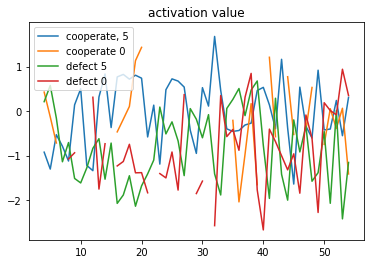

In [37]:
x = df_activation['step'].values.tolist()
y_1 = df_activation['c_ins_1_activation'].values.tolist() #5
y_2 = df_activation['c_ins_2_activation'].values.tolist() #0
y_3 = df_activation['d_ins_1_activation'].values.tolist()
y_4 = df_activation['d_ins_2_activation'].values.tolist()

plt.plot(x, y_1,label='cooperate, 5')
plt.plot(x, y_2,label='cooperate 0')
plt.plot(x, y_3,label='defect 5')
plt.plot(x, y_4,label='defect 0')
plt.title("activation value")
plt.legend()
plt.show()

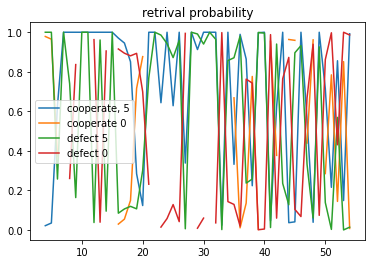

In [40]:
x = df_activation['step'].values.tolist()
y_1 = df_activation['c_ins_1_retP'].values.tolist() #5
y_2 = df_activation['c_ins_2_retP'].values.tolist() #0
y_3 = df_activation['d_ins_1_retP'].values.tolist()
y_4 = df_activation['d_ins_2_retP'].values.tolist()

plt.plot(x, y_1,label='cooperate, 5')
plt.plot(x, y_2,label='cooperate 0')
plt.plot(x, y_3,label='defect 5')
plt.plot(x, y_4,label='defect 0')
plt.title("retrival probability")
plt.legend()
plt.show()

In [ ]:
x = disconnected_df['round'].values.tolist()
y = disconnected_df['c_blending_value'].values.tolist()
z = disconnected_df['d_beldning_value'].values.tolist()
plt.plot(x, y,label='disconnected cooperate')
plt.plot(x, z,label='disconnected defect')
plt.legend()
plt.show()

df_act = df_activation['c_ins_1_utility','c_ins_1_activation']

## other inforation

In [32]:
agent_0_list = []
for i in range(len(df)):
    agent_0_list.append([i, df.iloc[i][0]['button'],df.iloc[i][0]['reputation'],df.iloc[i][0]['blended'],
    df.iloc[i][1]['button'],df.iloc[i][1]['reputation'],df.iloc[i][1]['blended']])
agent_0_list

[[0, 'cooperate', 'CC', 5, 'defect', 'CC', 5],
 [1, 'cooperate', 'DC', 5, 'defect', 'DC', 5],
 [2, 'cooperate', 'CD', 5, 'defect', 'CD', 5],
 [3, 'cooperate', 'CD', 5.0, 'defect', 'CD', 5.0],
 [4, 'cooperate', 'DD', 5, 'defect', 'DD', 5],
 [5, 'cooperate', 'CC', 5.0, 'defect', 'CC', 5.0],
 [6, 'cooperate', 'DD', 5.0, 'defect', 'DD', 5.0],
 [7, 'cooperate', 'CC', 5.0, 'defect', 'CC', 5.0],
 [8, 'cooperate', 'DC', 1.9967294792522847, 'defect', 'DC', 5.0],
 [9,
  'cooperate',
  'DC',
  0.908736984452317,
  'defect',
  'DC',
  0.026256814863280055],
 [10, 'cooperate', 'CC', 5.0, 'defect', 'CC', 3.5834669215840225]]

In [ ]:
df.iloc[2][1]#['activations']

## archive

In [ ]:
import random
import pyibl

In [ ]:
agents = [pyibl.Agent( name,["button", "reputation"], default_utility=5 ) for name in "0123456" ]
#paring 
pairing = [(0,1), (1,2),(2,3)] #singe [] - ver2.0
NODES = 6

In [ ]:
import test_step_n_round

In [ ]:
agents = test_step_n_round.play_round(agents,NODES, pairing)